# Práctica III de Bioinformática con BioPython
En esta práctica nos concentraremos en la composición de cadenas de ADN.

In [1]:
from Bio.Seq import Seq
from Bio.SeqUtils import gc_fraction

In [2]:
dna_seq=Seq("ATGATCTCGTAA")
dna_seq

Seq('ATGATCTCGTAA')

Inicialmente calcularemos la cantidad relativa de GC en nuestra cadena

In [3]:
gc_fraction(dna_seq)

0.3333333333333333

In [4]:
dna_seq.count("A")

4

Podemos crear una función propia con el mismo objetivo

In [5]:
def gc_contenido(seq):
    result = float(seq.count("G") + seq.count("C"))/len(seq)
    return result

In [6]:
gc_contenido(dna_seq)

0.3333333333333333

Podemos realizar lo mismo para AT

In [7]:
def at_contenido(seq):
    result = float(seq.count("A") + seq.count("T"))/len(seq)
    return result

In [8]:
at_contenido(dna_seq)

0.6666666666666666

## Punto de Fusión del ADN
El análisis de la composición de una cadena es vital dado que nos ayuda a hacer ciertas inferencias sobre las características de la misma como lo es el punto de fusión el cuál esta estrechamente relacionado con la cantidad de GC.

In [9]:
from Bio.SeqUtils import MeltingTemp as mt

In [10]:
dna_seq

Seq('ATGATCTCGTAA')

In [11]:
gc_fraction(dna_seq)

0.3333333333333333

In [12]:
#Podemos calcular el punto de fusión de la cadena con la regla de Wallace
mt.Tm_Wallace(dna_seq)

32.0

In [13]:
#Podemos calcular el punto de fusión de la cadena con el contenido de GC
mt.Tm_GC(dna_seq)

23.569568738644566

Biopython también nos ofrece herramientas para calcular el sesgo de GC como sigue:

In [14]:
from Bio.SeqUtils import GC123,GC_skew,xGC_skew

In [15]:
dna_seq

Seq('ATGATCTCGTAA')

In [16]:
GC123(dna_seq)

(33.333333333333336, 0.0, 25.0, 75.0)


El GC skew, o sesgo GC, es una medida utilizada en genómica para analizar la distribución de las bases nitrogenadas guanina (G) y citosina (C) en una cadena de ADN. Se calcula restando el número de guaninas del número de citosinas y dividiendo ese resultado por la suma de guaninas y citosinas. La fórmula es:

 $$\text{GC Skew} = \frac{G - C}{G + C} $$

El GC skew puede ser útil en diversos contextos, incluyendo:

Identificación de origen de replicación: El GC skew puede revelar la ubicación del origen de replicación en el ADN bacteriano, ya que tiende a mostrar un cambio brusco en el sesgo cerca de este punto.

Análisis genómico: Puede proporcionar información sobre la composición de bases en regiones específicas del genoma, lo que puede estar relacionado con la estructura y función de genes.

Estudio de la evolución: Cambios en el GC skew a lo largo de un genoma pueden ofrecer pistas sobre eventos evolutivos y presiones selectivas.

Detección de islas CpG: Puede utilizarse para identificar regiones del genoma que contienen una alta densidad de dinucleótidos CpG, lo cual es relevante en epigenética y regulación génica.

En resumen, el GC skew es una herramienta valiosa en genómica para analizar patrones de composición de bases en el ADN y obtener información sobre la replicación, evolución y características genómicas.

In [17]:
GC_skew(dna_seq,10)

[0.0, 0.0]

In [25]:
GC_skew("ATGGGGTCCCGCTC")

[0.0]

In [26]:
xGC_skew(dna_seq)

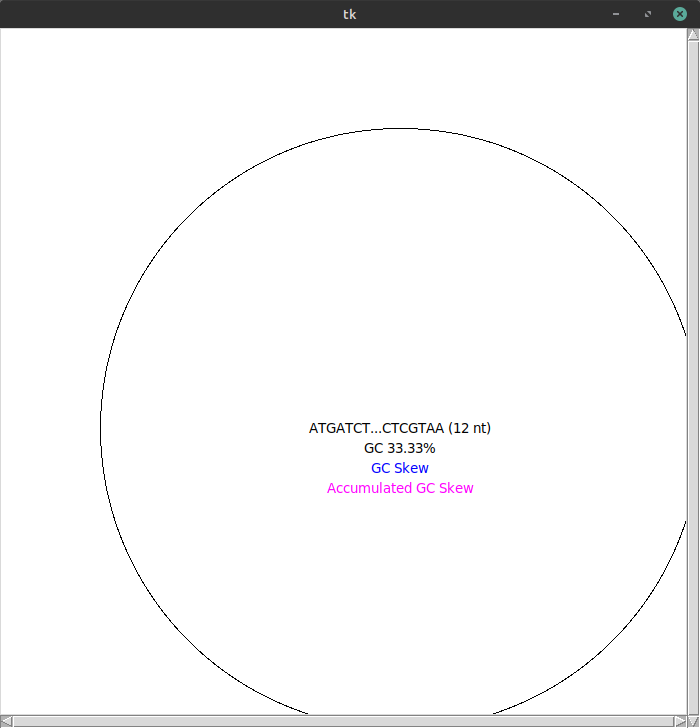

## Subsecuencias
En esta parte analizaremos como encontrar subsecuencias de ADN en una cadena ya dada.

In [28]:
from Bio.SeqUtils import nt_search

In [32]:
main_seq = Seq("ACTATT")
subseq = Seq("ATT")

In [33]:
nt_search(str(main_seq), str(subseq))

['ATT', 3]